In [4]:
import numpy as np
import pandas as pd
import random
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

data = np.array([[1,5], 
                 [2, 7],
                 [3, 7],
                 [4, 10],
                 [5, 11], 
                 [6, 14],
                 [7, 17], 
                 [8, 19], 
                 [9, 22],
                 [10, 28]])

In [8]:
# градиентный спуск, для работы используются ВСЕ доступные обучающие данные.
# на практике используется стохастический градиентный спуск. 
# на каждой итерации обучаемся тролько на одной выборке из данных
# мини - пакетный градиентный спуск. на каждой итерации используется несколько выборок.

In [10]:
x = data[:, 0]
y = data[:, 1]
n = len(x)
w1 = 0.0
w0 = 0.0
L = 0.001
sample_size = 1
iterations = 100_000
for i in range(iterations):
    idx = np.random.choice(n, sample_size, replace=False)
    D_w0 = 2 * sum(-y[idx] + w0 + w1 * x[idx])
    D_w1 = 2 * sum(x[idx]  * (-y[idx] + w0 + w1 * x[idx]))
    w1 -= L * D_w1
    w0 -= L * D_w0

print(w1, w0)

2.3324401332109455 0.8289916317724831


In [18]:
# как оценить насколько сильно промахиваются прогнозы
data_df = pd.DataFrame(data)
print(data_df.corr(method='pearson'))
# коэфф корреляции помогает понять есть ли связь между двумя переменными

         0        1
0  1.00000  0.97684
1  0.97684  1.00000


In [26]:
data_df[1] = (data_df[1].values[::-1])
print(data_df.corr(method='pearson'))

         0        1
0  1.00000  0.97684
1  0.97684  1.00000


In [32]:
# обучающие и тестовые выборки - основной метод борьбы с переобучением
X = data_df.values[:, :-1]
Y = data_df.values[:, 1]
print(X)
print(Y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[ 5  7  7 10 11 14 17 19 22 28]


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3)

In [36]:
model = LinearRegression()
model.fit(X_train, Y_train)
r = model.score(X_test, Y_test)
print(r)

0.8913403880070548


In [42]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=3, random_state=1, shuffle=True)
model = LinearRegression()
result = cross_val_score(model, X, Y, cv=kfold)
print(result) # средние квадратические ошибки
print(result.mean(), result.std())

[ 0.88414769 -2.35154626  0.75792214]
-0.23649214168138835 1.4964566263570558


In [44]:
# поэлементная перекрестная валидация - мало данных
# случайная валидация - перемешиваем данные и используем несколько раз


In [46]:
data_df = pd.read_csv('multiple_independent_variable_linear.csv')
print(data_df.head())

   x1  x2   y
0   0  22  88
1   1  13  62
2   1  15  67
3   1  14  62
4   2  18  77


In [89]:
X = data_df.values[:,:-1]
Y = data_df.values[:, -1]
model = LinearRegression().fit(X, Y)
print(model.coef_, model.intercept_)

[2.00672647 3.00203798] 20.109432820035977


69 69
69 69 69


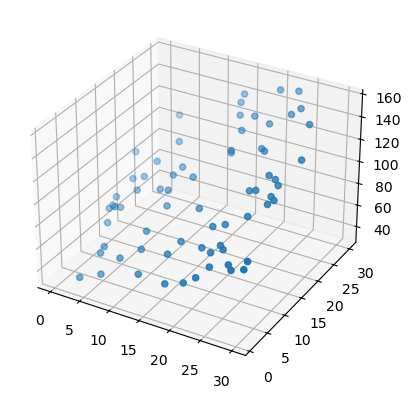

<Figure size 640x480 with 0 Axes>

In [91]:
fig = plt.figure()
ax = plt.axes(projection='3d')
x1 = X[:, 0]
x2 = X[:, 1]
y = Y
print(len(X), len(Y))
print(len(x1), len(x2), len(y))
fig = plt.figure()
ax.scatter3D(x1, x2, y)

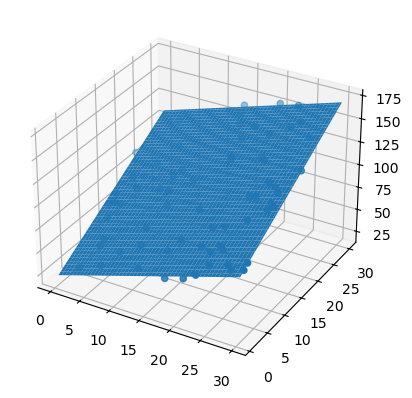

In [93]:
x1_ = np.linspace(min(x1), max(x1), 100)
x2_ = np.linspace(min(x2), max(x2), 100)
X1_, X2_ = np.meshgrid(x1_, x2_)
Y_ = model.intercept_ + model.coef_[0]*X1_ + model.coef_[1]*X2_
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x1, x2, y)
ax.plot_surface(X1_, X2_, Y_)
plt.show()